# Numerical Result Part Figure 2: split vs depth


In [1]:
import pickle as pk
data = pk.load(open("output/eqs.pkl", "rb"))
data

,num_var,num_sol,seed,sol,eqs
0,10,1,85029,[44],"[[160, 144, 48, 1, 136, 65, 288, 8, 68, 34, 19..."
1,10,1,11854,[40],"[[12, 130, 10, 65, 9, 136, 4, 40, 66, 36, 320,..."
2,10,1,10003,[52],"[[136, 12, 257, 160, 68, 32, 64, 16, 132, 5, 1..."
3,10,1,96405,[527],"[[129, 16, 66, 6, 64, 260, 20, 34, 144, 576, 2..."
4,10,1,54001,[238],"[[288, 40, 34, 0, 1, 264, 18, 66, 144, 258, 4,..."
...,...,...,...,...,...
1359,25,20,94365,"[479224, 3181957, 4673655, 9049868, 11254080, ...","[[262146, 4352, 4098, 4194312, 1114112, 1028, ..."
1360,25,17,8142,"[1320531, 1639239, 2018530, 6748658, 7363292, ...","[[1048592, 4096, 2621440, 8454144, 8388864, 83..."
1361,25,18,51098,"[2956794, 3310703, 5416428, 8060904, 9591861, ...","[[18432, 2112, 131076, 2621440, 526336, 18, 44..."
1362,25,16,12652,"[2572577, 3646063, 4109277, 8461596, 13713527,...","[[4718592, 524352, 9, 2050, 65552, 66, 9437184..."


In [2]:
circ_split_data = pk.load(open("scripts/run_circ_split_clean.pkl", "rb"))
circ_split_data["num_anc"] = circ_split_data["result"].map(lambda x: x.pop("num of ancillas"))
circ_split_data["iter G"] = circ_split_data["result"].map(lambda x: x.pop("num of iterating G"))
circ_split_data["depth"] = circ_split_data["result"].map(lambda x: x.pop("depth of qc"))
circ_split_data["bfs time"] = circ_split_data["result"].map(lambda x: x.pop("brute force time"))
circ_split_data["runtime"] = circ_split_data["result"].map(lambda x: x["Result"].pop("time_taken"))
circ_split_data["buildtime"] = circ_split_data["result"].map(lambda x: x.pop("total execute time"))
circ_split_data["buildtime"] -= circ_split_data["runtime"]
circ_split_data["gates"] = circ_split_data["result"].map(lambda x: x.pop("gate count of qc"))
circ_split_data["success"] = circ_split_data["result"].map(lambda x: x.pop("success"))

<AxesSubplot:>

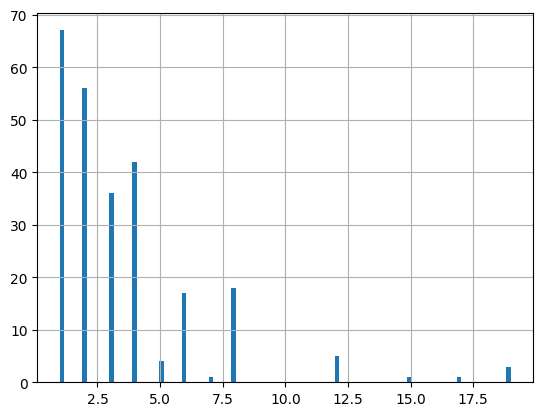

In [3]:
circ_split_data[~circ_split_data["success"]]["iter G"].hist(bins=100)

In [4]:
# compute actual split
from utils import determine_maximum_allowed_eqs

# find the number of equations in each row of circ_split_data based on num_var, num_sol, seed, joining the values in data
data["eqs_len"] = data["eqs"].map(lambda x: len(x))
c2 = circ_split_data.join(data.set_index(["num_var", "num_sol", "seed"]), on=["num_var", "num_sol", "seed"], how="left")


c2["split"] = -1.0
for i, row in c2.iterrows():
    c2.at[i, "split"] = row["eqs_len"] / determine_maximum_allowed_eqs(row["num_anc"], row["level"])


In [5]:
d = c2.iloc[0]["result"]
print(list(d.keys()))
print(list(d["Result"].keys()))
print(list(d["Result"]["results"][0]["metadata"].keys()))

['Result', 'top measurement', 'brute force result', 'num of variables', 'arrange', 'multiprocess', 'split', 'level']
['backend_name', 'backend_version', 'date', 'header', 'qobj_id', 'job_id', 'status', 'success', 'results', 'metadata']
['parallel_state_update', 'noise', 'batched_shots_optimization', 'measure_sampling', 'device', 'num_qubits', 'parallel_shots', 'remapped_qubits', 'method', 'active_input_qubits', 'num_clbits', 'input_qubit_map', 'fusion', 'result_types', 'result_subtypes']


In [6]:
num_success_15 = len(c2[(c2.num_var == 15) & (c2.success)])
num_fail_15 = len(c2[(c2.num_var == 15) & (~c2.success)])
print("Failed: ", num_fail_15)
print("Succeeded: ", num_success_15)
print("Success percentage: ", num_success_15 / (num_success_15 + num_fail_15))


Failed:  109
Succeeded:  403
Success percentage:  0.787109375


In [7]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 16})
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

df = pd.DataFrame()
df[r"num_sol"] = c2["num_sol"]
df[r"num_var"] = c2["num_var"]
df[r"split"] = c2["split"]
df = df[df.split>=1]
df[r"depth"] = c2["depth"]
df["depth_percentage"] = df.groupby(["num_var", "num_sol"])["depth"].apply(lambda x: x / x.max())
df = df[df.num_var == 15]

arr = np.array([1, 2, 5, 10, 20])
df[r"category"] = df.apply(lambda x: f""
                           f"[{len(arr[arr <= x.num_sol]) and arr[arr <= x.num_sol][-1]}, "
                           f"{len(arr[arr > x.num_sol]) and arr[arr > x.num_sol][0] or 90})"
                           f" sols", axis=1)


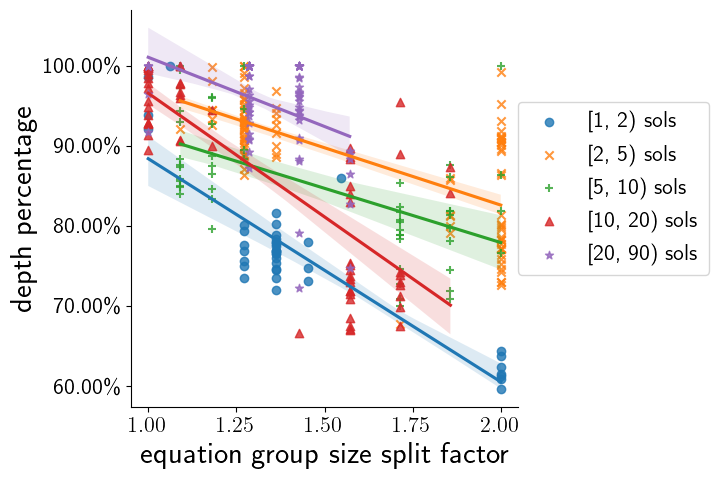

In [39]:
sns.lmplot(
    data=df, x="split", y="depth_percentage", hue=r"category",
    # ax=ax,
    # errorbar=("ci", 95),
    n_boot=15,
    # capsize=.1,
    # markers=["o", "+", "x"],
    markers=["o", "x", "+", "^", "*"],
    # linestyles=["-", "-", "-"] * 10,
    # scale=0.8,
    # errwidth=1.5,
    legend=False,
    scatter_kws={"alpha": 0.8}
)

# ax.set_yscale('log')
# ax.set_ylim(3, 30)
# plt.title(r"level = $2$")
# plt.tight_layout()
# plt.xlim(None, 3)
plt.xlabel(r'equation group size split factor', fontsize=22)
plt.ylabel(r'depth percentage', fontsize=22)

import matplotlib.ticker as mtick
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=2))

plt.legend(bbox_to_anchor=(0.97, 0.55), loc="center left")

plt.savefig("../figure/split-vs-depth.pdf", bbox_inches="tight")
plt.show()

---

For n = 20 (dry run)

In [40]:
circ_split_data = pk.load(open("output/run_circ_split_dry.pkl", "rb"))
circ_split_data["num_anc"] = circ_split_data["result"].map(lambda x: x.pop("num of ancillas"))
circ_split_data["iter G"] = circ_split_data["result"].map(lambda x: x.pop("num of iterating G"))
circ_split_data["depth"] = circ_split_data["result"].map(lambda x: x.pop("depth of qc"))
circ_split_data["bfs time"] = circ_split_data["result"].map(lambda x: x.pop("brute force time"))
circ_split_data["runtime"] = circ_split_data["result"].map(lambda x: x["Result"].pop("time_taken"))
circ_split_data["buildtime"] = circ_split_data["result"].map(lambda x: x.pop("total execute time"))
circ_split_data["buildtime"] -= circ_split_data["runtime"]
circ_split_data["gates"] = circ_split_data["result"].map(lambda x: x.pop("gate count of qc"))
circ_split_data["success"] = circ_split_data["result"].map(lambda x: x.pop("success"))

In [41]:
# compute actual split
from utils import determine_maximum_allowed_eqs

# find the number of equations in each row of circ_split_data based on num_var, num_sol, seed, joining the values in data
data["eqs_len"] = data["eqs"].map(lambda x: len(x))
c2 = circ_split_data.join(data.set_index(["num_var", "num_sol", "seed"]), on=["num_var", "num_sol", "seed"], how="left")

c2["split"] = -1.0
for i, row in c2.iterrows():
    c2.at[i, "split"] = row["eqs_len"] / determine_maximum_allowed_eqs(row["num_anc"], row["level"])


In [42]:

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 16})
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

df = pd.DataFrame()
df[r"num_sol"] = c2["num_sol"]
df[r"num_var"] = c2["num_var"]
df[r"split"] = c2["split"]
df = df[df.split>=1]
df[r"depth"] = c2["depth"]
df["depth_percentage"] = df.groupby(["num_var", "num_sol"])["depth"].apply(lambda x: x / x.max())
df = df[df.num_var == 20]
# df = df[df.num_sol <= 4]
arr = np.array([1, 2, 5, 10, 20])
df[r"category"] = df.apply(lambda x: f""
                           f"[{len(arr[arr <= x.num_sol]) and arr[arr <= x.num_sol][-1]}, "
                           f"{len(arr[arr > x.num_sol]) and arr[arr > x.num_sol][0] or 90})"
                           f" sols", axis=1)


In [43]:
df.groupby(["num_var", "category"]).count()

num_sol  split  depth  depth_percentage
num_var category                                              
20      [1, 2) sols         61     61     61                61
        [10, 20) sols       64     64     64                64
        [2, 5) sols        100    100    100               100
        [20, 90) sols       74     74     74                74
        [5, 10) sols        64     64     64                64

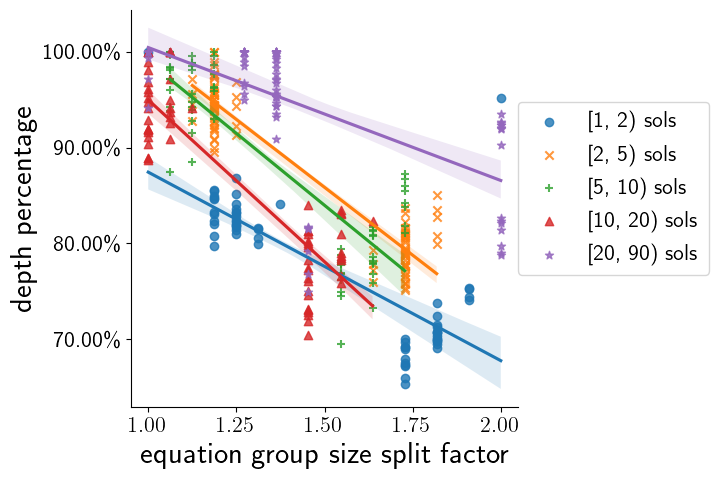

In [44]:
# fig, ax = plt.subplots(1, 1, figsize=(6,5))
sns.lmplot(
    data=df, x="split", y="depth_percentage", hue=r"category",
    # ax=ax,
    # errorbar=("ci", 95),
    n_boot=15,
    # capsize=.1,
    # markers=["o", "+", "x"],
    markers=["o", "x", "+", "^", "*"],
    # linestyles=["-", "-", "-"] * 10,
    # scale=0.8,
    # errwidth=1.5,
    legend=False,
    scatter_kws={"alpha": 0.8}
)

# ax.set_yscale('log')
# ax.set_ylim(3, 30)
# plt.title(r"level = $2$")
# plt.tight_layout()
# plt.xlim(None, 3)
plt.xlabel(r'equation group size split factor', fontsize=22)
plt.ylabel(r'depth percentage', fontsize=22)

import matplotlib.ticker as mtick
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=2))

plt.legend(bbox_to_anchor=(0.97, 0.55), loc="center left")

plt.savefig("../figure/split-vs-depth-20.pdf", bbox_inches="tight")
plt.show()